# Point and interval estimation

In this programming assignment, you will explore the behaviour of the maximum likelihood estimators and confidence intervals using simulations. 

In [2]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)


# Point estimation

#Q1
A. Draw 10 sample of size $n=10$ from $Exp(1.5)$ distribution.

B. For each sample, estimate the parameter $\lambda$ (as if it was unknown to us) using the MLE estimator. 

C. At this point, you should have 10 different estimators for $\lambda$. Do you think that they are good estimators? Why? 

D. Repeat A and B for $n=50$ and $n=100$. 

E. Compare between all the 30 estimators. Does the sample size affect the goodness of estimation? How can we see that? 

In [10]:
#Your code goes here
# A+B
# Here we draw the sample:
def calc_sample_mean(size, loc=1/1.5, num_samples=10):
    arr = []
    for i in range(num_samples):
        arr.append(np.random.exponential(loc, size=size))
    return np.array([1/sample.mean() for sample in arr ]) # reminder lambda_mle = 1/mean()

#Here we compute \lambda for each sample:
est_10 = calc_sample_mean(10)
print(est_10)

[1.13177428 2.31051794 1.40812197 2.60179628 4.68941633 0.88590777
 1.35382752 1.85994978 1.71334515 1.87406889]


C. We can see that the mean samples has many different values from 0.74 to 2.1<br>    
To decide if our estimated $\lambda$ are 'good' we can estimate their MSE. 

In [11]:
#D:
est_50 = calc_sample_mean(50)
est_100 = calc_sample_mean(100)

In [14]:

def mse(estimated, true_V):
    return np.square(estimated - true_V).mean()

mse(est_10, 1.5), mse(est_50, 1.5), mse(est_100, 1.5)

(1.2900785860207173, 0.028407217914094472, 0.028139203838785886)

We can see that the error decrease as the sample size increases.<br>
In the next cell we show the improvement in the estimated $\lambda$ and the MSE as the sample size grow

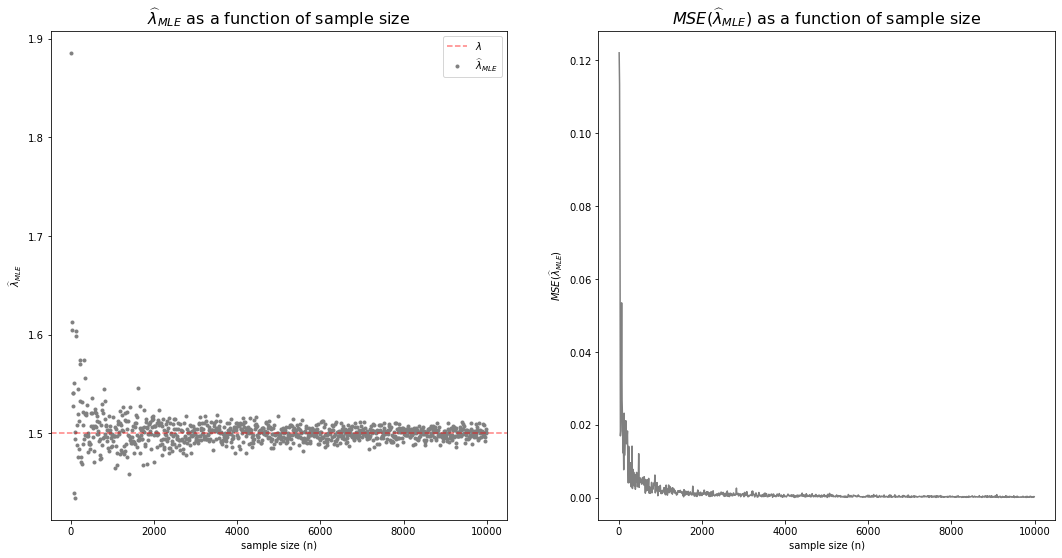

In [17]:
N = 10000
x_sample = np.arange(10,N,10)
lambda_mle = np.array([np.mean(calc_sample_mean(n)) for n in x_sample])
MSE_mle = np.array([mse(calc_sample_mean(n) , 1.5) for n in x_sample])

plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
plt.scatter(x_sample, lambda_mle, color='gray', marker='.', label='$\widehat{\lambda}_{MLE}$')
plt.axhline(1.5, 0, N, color='red', alpha=0.5, linestyle='--', label='$\lambda$')
plt.xlabel('sample size (n)')
plt.ylabel('$\widehat{\lambda}_{MLE}$')
plt.legend()
plt.title('$\widehat{\lambda}_{MLE}$ as a function of sample size', size=16)

plt.subplot(1,2,2)
plt.plot(x_sample, MSE_mle, color='gray')
plt.xlabel('sample size (n)')
plt.ylabel('$MSE(\widehat{\lambda}_{MLE}$)')
plt.title('$ MSE(\widehat{\lambda}_{MLE}) $ as a function of sample size', size=16)
plt.show()


# Q2
Draw a sample of 200 observations $X_1,...,X_{200}$ from $Exp(3)$ distribution. Compute the log-likelihood for different values of $\theta$ and make a plot. At which point approximately the maximum is attained? 

Recall that in this case, 
$$\ell(\theta;X)=n\log \theta -\theta \sum_{i=1}^nX_i$$



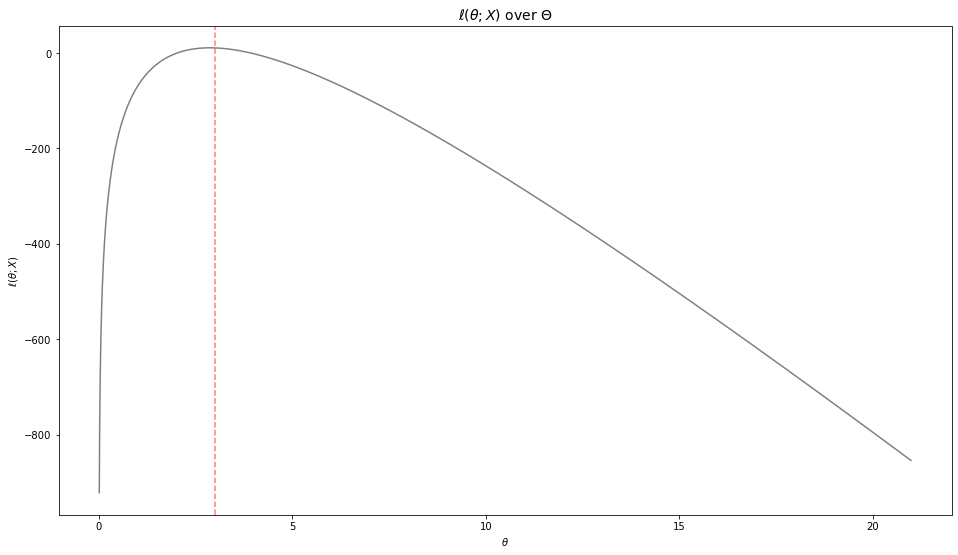

In [47]:
#Your code goes here

N = 200
BETA = 1/3
x = np.random.exponential(BETA,N)
x_sum=np.sum(x)
t_range = np.arange(0.01,21,0.01)

ll = [N*np.log(theta)-theta*x_sum for theta in t_range]
plt.figure(figsize=(16,9))
plt.plot(t_range, ll, color='gray')
plt.axvline(3, color='red', linestyle='--', alpha=0.5)
plt.xlabel('$\\theta$')
plt.ylabel('$\ell(\\theta;X)$')
plt.title('$\ell(\\theta;X)$ over $\Theta$', size=14)
plt.show()

We can see that $0.333 = argmax_{\Theta}\, \ell(\theta;X)$. This result was expected as the MLE estimator is one over the mean, which (by LLN) for n big enough converges to one over the true value of $\theta$

# Confidence intervals 

# Q3
In this exercise, we will reproduce the graph from slide 24 (lecture 4). 

A. Draw 100 samples of size 100 each from normal distribution with $\mu = 5, \sigma^2=1$. 

B. For each sample, compute the confidence interval for $\mu$ with confidence level 95%. 

C. Reproduce the graph from the lecture for your confidence interval. 

D. Calculate the average coverage of your confidence intervals. 

E. Repeat B-D for confidence level of 90%. Discuss the results. 

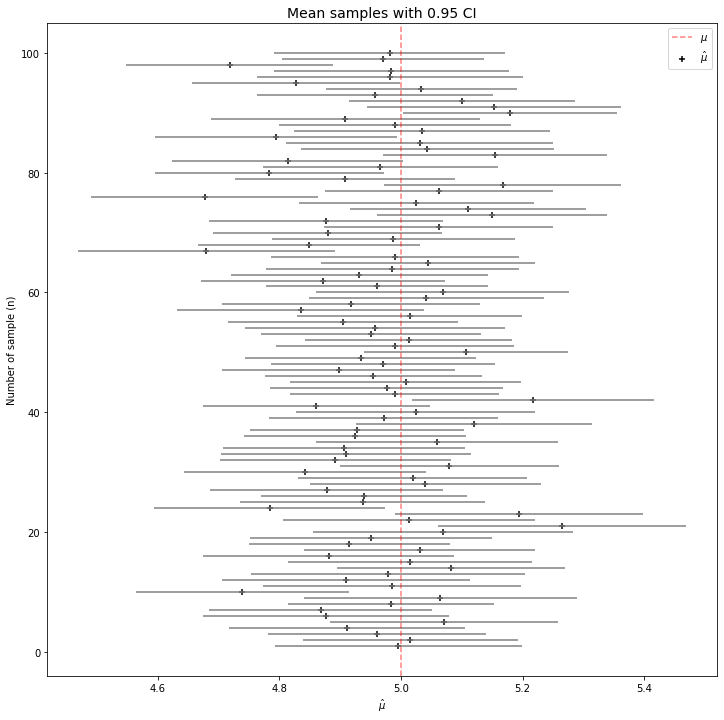

The average coverage of the confidence intervals is 0.89


In [9]:

def calc_sample_mean(size=100, loc=5, scale=1, num_samples=10):
    arr = []
    for i in range(num_samples):
        arr.append(np.random.normal(loc=loc, scale=scale, size=size))
    return np.array([sample.mean() for sample in arr ]) , np.array([sample.std() for sample in arr ])

def conf_interval(mu, sigma, size, alpha):
    z = scipy.stats.norm.ppf(1-alpha/2)
    c1 = mu - z*sigma/np.sqrt(size)
    c2 = mu + z*sigma/np.sqrt(size)
    return (c1,c2)


def fig_CI(CI, alpha=0.05):

    plt.figure(figsize=(12,12))
    
    for n in range(100):
        plt.hlines(n+1,CI[0][n], CI[1][n], colors='gray')
    
    plt.scatter( mu , range(1,101), color='black', marker='+', label='$\hat{\mu}$')
    plt.axvline(5, color='red', linestyle='--', alpha=0.5, label='$\mu$')
    
    plt.xlabel('$\hat{\mu}$')
    plt.ylabel('Number of sample (n)')
    plt.legend()
    plt.title(f'Mean samples with {1-alpha} CI', size=14)
    plt.show()

def avg_ci_coverage(CI):
    mean_coverage = np.mean([1 if ((c1 <= 5) & (c2 >= 5)) else 0 for c1, c2 in zip((CI[0]),CI[1])])
    print(f'The average coverage of the confidence intervals is {mean_coverage}')

#A:
mu, sigma = calc_sample_mean(num_samples=100)

#B:
CI = conf_interval(mu, sigma, 100, 0.05)

#C:
fig_CI(CI)

#D:
avg_ci_coverage(CI)


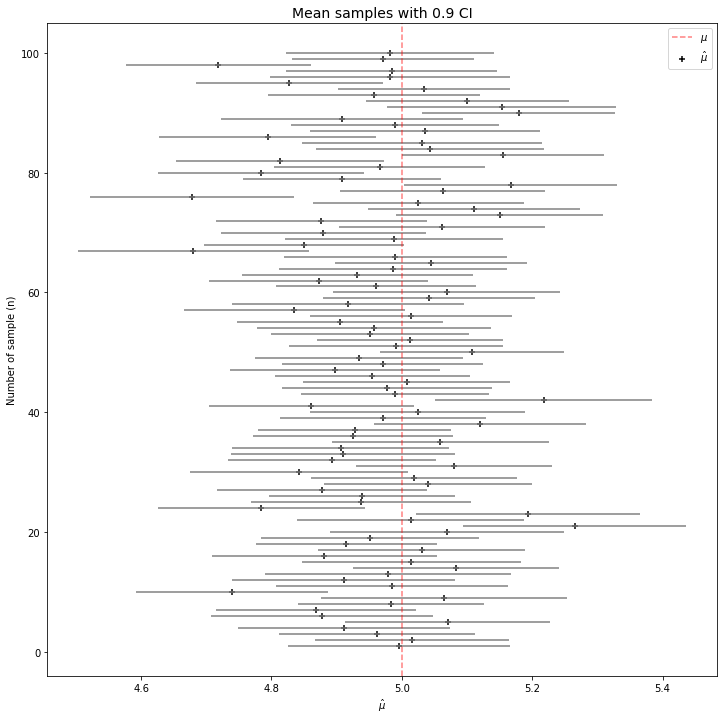

The average coverage of the confidence intervals is 0.85


In [10]:
# E:
CI_90 = conf_interval(mu, sigma, 100, 0.1)
fig_CI(CI_90, 0.1)
avg_ci_coverage(CI_90)